In [21]:
import pandas as pd


In [22]:
data=pd.read_csv(r'C:\Users\HP\Desktop\Telco-Customer-Churn.csv')

In [23]:
print("Rows{} Columns{}".format(data.shape[0],data.shape[1]))

Rows7043 Columns21


In [24]:
print("Columns and Datatypes")
pd.DataFrame(data.dtypes).rename(columns={0:'dtypes'})

Columns and Datatypes


,dtypes
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [25]:
df=data.copy()

In [26]:
# there as multiple columns to simplify oue experiments we will only use 2 columns(features) Tenure and 
# MonthlyCharges and the target would be Churn of course.

In [27]:
# EDA - Exploratory Data Analysis

In [28]:
import numpy as np
import matplotlib.pyplot as plt

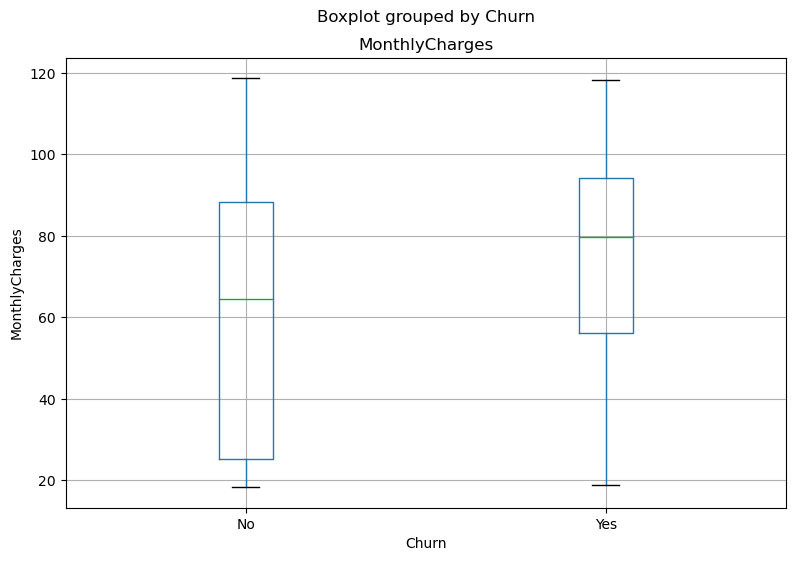

In [29]:
fig = plt.figure(figsize=(9,6))
ax=fig.gca()
df.boxplot(column='MonthlyCharges',by='Churn',ax=ax)
ax.set_ylabel('MonthlyCharges')
plt.show()

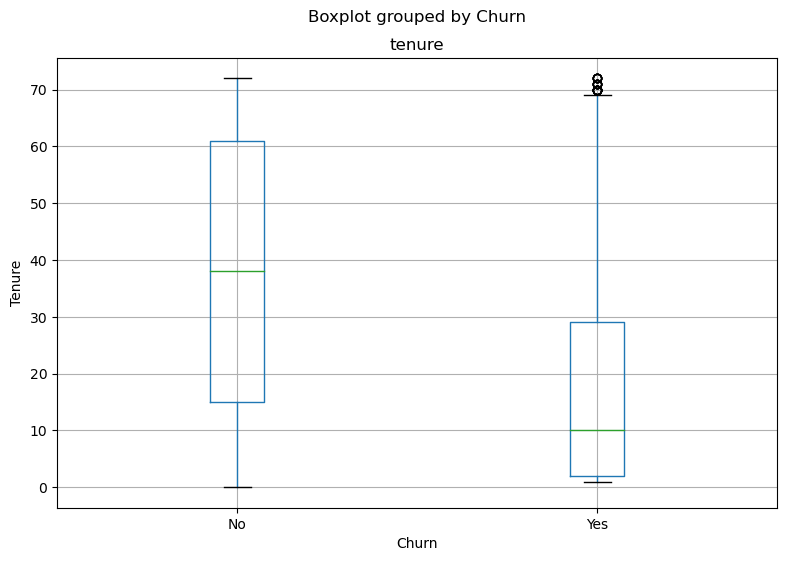

In [30]:
fig = plt.figure(figsize=(9,6))
ax=fig.gca()
df.boxplot(column='tenure',by='Churn',ax=ax)
ax.set_ylabel('Tenure')
plt.show()

In [31]:
# insights from our simple EDA:
# ->we can see difference btw our target classes on tenures you can see in the seconnd boxplot,
# which is good becoz our model(logistic regressoin) may use this to separate the two classes
# -> there is also slight diff btw our target classes on monthly charges as shown in first boxplot

In [32]:
# converting churn feature(string) to int {yes:1,no:0}
df['class']=df['Churn'].apply(lambda x:1 if x=="Yes" else 0)
# features will be saved by X and our target will be saved by y
X=df[['tenure','MonthlyCharges']].copy()
y=df['class'].copy()

In [33]:
df.shape


(7043, 22)

In [34]:
# splitting data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [35]:
y_train.value_counts()

class
0    4133
1    1501
Name: count, dtype: int64

In [36]:
y_test.value_counts()

class
0    1041
1     368
Name: count, dtype: int64

In [37]:
# Fitting logistic regression
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression(fit_intercept=True,max_iter=10000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [38]:

# Get the model coefficients
clf.coef_

array([[-0.05646728,  0.03315385]])

In [39]:
clf.intercept_

array([-1.77408975])

In [40]:
# Evaluating the performance of the trained model

In [41]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [42]:
X_test

,tenure,MonthlyCharges
2200,19,58.20
4627,60,116.60
3225,13,71.95
2828,1,20.45
3768,55,77.75
...,...,...
2631,7,99.25
5333,13,88.35
6972,56,111.95
4598,18,56.25


In [43]:
test_preds

array([[0.7145149 , 0.2854851 ],
       [0.78522641, 0.21477359],
       [0.53064776, 0.46935224],
       ...,
       [0.77288679, 0.22711321],
       [0.71618111, 0.28381889],
       [0.57740038, 0.42259962]])

In [44]:

train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [45]:
test_preds

array([0.2854851 , 0.21477359, 0.46935224, ..., 0.22711321, 0.28381889,
       0.42259962])

In [46]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [47]:

train_class_preds

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [49]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7857649982250621
The accuracy on test data is  0.7735982966643009


[[3745  388]
 [ 819  682]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

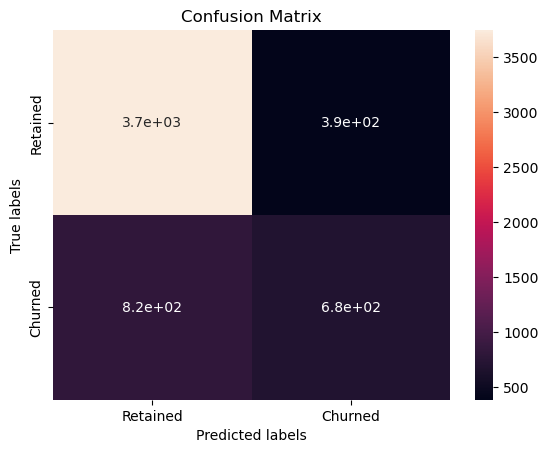

In [50]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[934 107]
 [212 156]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

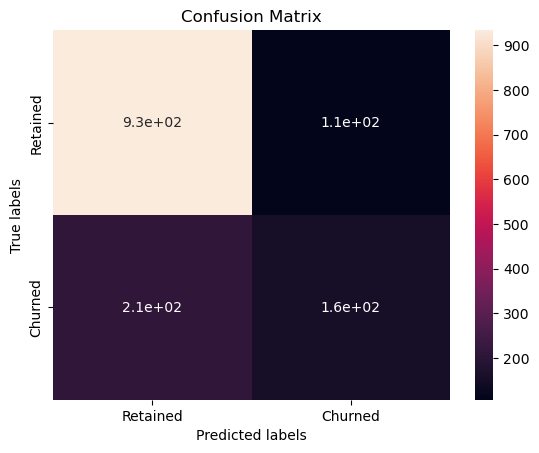

In [51]:

# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [52]:
# Implementing Cross-validated Logistic Regression

In [53]:

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [54]:
logistic = LogisticRegression()

In [55]:
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.785, test=0.789) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.787, test=0.791) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.788, test=0.771) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.789, test=0.775) total time=   0.0s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.781, test=0.806) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [56]:
scores['train_accuracy']

array([0.78500111, 0.78677613, 0.78788551, 0.78877302, 0.78127773])

In [57]:

scores['test_accuracy']

array([0.78881988, 0.79148181, 0.77107365, 0.77462289, 0.80639432])

In [58]:

scores['estimator']

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

In [59]:

for model in scores['estimator']:
    print(model.coef_)

[[-0.05617762  0.03293792]]
[[-0.05562275  0.03215852]]
[[-0.05820295  0.03454813]]
[[-0.05711808  0.03362381]]
[[-0.05530045  0.03257423]]
